# Modeling

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

## Load Data

In [2]:
# load training run (with labels Healthy, NearFailure, Failure)
df = pd.read_csv("/kaggle/input/bearings-features-ml/bearing_features_ml.csv")


In [3]:
df.head()

,rms,kurtosis,crest_factor,spectral_entropy,dominant_frequency,health_state,bearing_name
0,-1.404872,-0.294089,-0.749561,-3.045741,-0.08463,0.0,labeled_df1_bearing3_ch5
1,-1.387942,-0.277844,-0.143750,-4.067255,-0.08463,0.0,labeled_df1_bearing3_ch5
2,-1.473794,-0.279811,-0.548704,-2.015796,-0.08463,0.0,labeled_df1_bearing3_ch5
3,-1.477916,-0.296020,-0.260474,-3.425314,-0.08463,0.0,labeled_df1_bearing3_ch5
4,-1.413450,-0.285762,-0.420460,-3.459451,-0.08463,0.0,labeled_df1_bearing3_ch5


In [4]:
df_test = df[df["bearing_name"].str.contains("labeled_df2_bearing1")].copy()
df_test.head()

,rms,kurtosis,crest_factor,spectral_entropy,dominant_frequency,health_state,bearing_name
7308,-0.548710,-0.205508,1.643400,0.485236,-0.419111,0.0,labeled_df2_bearing1
7309,-0.528030,-0.185277,-0.046506,1.155730,-0.419111,0.0,labeled_df2_bearing1
7310,-0.513470,-0.324940,2.473626,1.057599,-0.419111,0.0,labeled_df2_bearing1
7311,-0.470615,0.342708,4.426592,1.112768,-0.419111,0.0,labeled_df2_bearing1
7312,-0.474901,-0.232013,-0.332247,0.990680,-0.419111,0.0,labeled_df2_bearing1


In [5]:
# All other bearings → training set
df_train = df[~df["bearing_name"].str.contains("labeled_df2_bearing1")].copy()
df_train.head()


,rms,kurtosis,crest_factor,spectral_entropy,dominant_frequency,health_state,bearing_name
0,-1.404872,-0.294089,-0.749561,-3.045741,-0.08463,0.0,labeled_df1_bearing3_ch5
1,-1.387942,-0.277844,-0.143750,-4.067255,-0.08463,0.0,labeled_df1_bearing3_ch5
2,-1.473794,-0.279811,-0.548704,-2.015796,-0.08463,0.0,labeled_df1_bearing3_ch5
3,-1.477916,-0.296020,-0.260474,-3.425314,-0.08463,0.0,labeled_df1_bearing3_ch5
4,-1.413450,-0.285762,-0.420460,-3.459451,-0.08463,0.0,labeled_df1_bearing3_ch5


In [6]:
X = df_train.drop(columns=["bearing_name", "health_state"])  # features only
y = df_train["health_state"]                              # target variable

In [7]:
X_test = df_test.drop(columns=["bearing_name", "health_state"])
y_test = df_test["health_state"]   

In [8]:
X_test.head()

,rms,kurtosis,crest_factor,spectral_entropy,dominant_frequency
7308,-0.548710,-0.205508,1.643400,0.485236,-0.419111
7309,-0.528030,-0.185277,-0.046506,1.155730,-0.419111
7310,-0.513470,-0.324940,2.473626,1.057599,-0.419111
7311,-0.470615,0.342708,4.426592,1.112768,-0.419111
7312,-0.474901,-0.232013,-0.332247,0.990680,-0.419111


## Model training and comparison


=== Random Forest Test Report ===
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       651
         1.0       1.00      0.67      0.80       251

    accuracy                           0.91       902
   macro avg       0.94      0.83      0.87       902
weighted avg       0.92      0.91      0.90       902



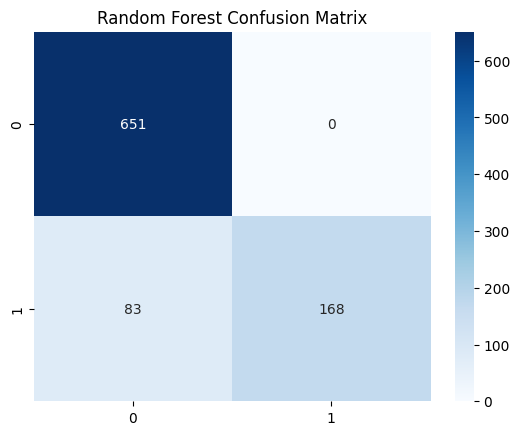


=== XGBoost Test Report ===
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       651
         1.0       1.00      0.78      0.88       251

    accuracy                           0.94       902
   macro avg       0.96      0.89      0.92       902
weighted avg       0.94      0.94      0.94       902



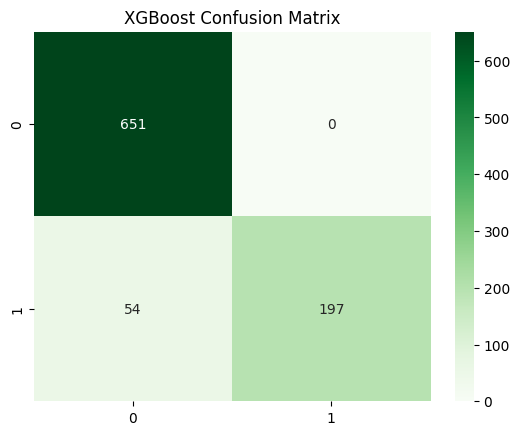

In [9]:
# -----------------------------
# 5. Train Random Forest on full train set
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X, y)  # X, y = your training data
y_test_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Test Report ===")
print(classification_report(y_test, y_test_pred_rf))

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# -----------------------------
# 6. Train XGBoost on full train set
# -----------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X, y)
y_test_pred_xgb = xgb.predict(X_test)

print("\n=== XGBoost Test Report ===")
print(classification_report(y_test, y_test_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()


## Model choice
We chose XGBoost because, in our comparison on held-out bearings, it achieved higher overall accuracy and better detection of degraded bearings (higher recall for class 1) while maintaining perfect recall on healthy bearings. This makes it more reliable for predictive maintenance, where catching early signs of degradation is critical.

## Model training on 100%

In [10]:
X = df.drop(columns=["bearing_name", "health_state"])  # features only
y = df["health_state"]                              # target variable

In [11]:
X.head()

,rms,kurtosis,crest_factor,spectral_entropy,dominant_frequency
0,-1.404872,-0.294089,-0.749561,-3.045741,-0.08463
1,-1.387942,-0.277844,-0.143750,-4.067255,-0.08463
2,-1.473794,-0.279811,-0.548704,-2.015796,-0.08463
3,-1.477916,-0.296020,-0.260474,-3.425314,-0.08463
4,-1.413450,-0.285762,-0.420460,-3.459451,-0.08463


In [12]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: health_state, dtype: float64

In [13]:
# -----------------------------
# 3. Train final XGBoost model
# -----------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X, y)

print("XGBoost model trained on 100% of data.")

XGBoost model trained on 100% of data.


## Model training on three features only RMS, Kurtosis, CrestFactor
Matching the CWRU Bearing Dataset

In [14]:
X = df.drop(columns=["bearing_name", "health_state", "spectral_entropy", "dominant_frequency"])  # features only
y = df["health_state"]                              # target variable

In [15]:
# -----------------------------
# 3. Train final XGBoost model
# -----------------------------
xgb_3_features = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_3_features.fit(X, y)

print("XGBoost model trained on 100% of 3 features data.")

XGBoost model trained on 100% of 3 features data.


## Model evaluation

Using the CWRU Bearing Dataset. 

In [16]:
df_cwru = pd.read_csv("/kaggle/input/cwru-bearing-datasets/feature_time_48k_2048_load_1.csv")

In [17]:
df_cwru.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1


In [18]:
df_cwru = df_cwru.drop(columns=["max", "min", "mean", "sd", "skewness", "form"])  # features only

In [19]:
df_cwru.head()

,rms,kurtosis,crest,fault
0,0.124006,-0.042219,2.901946,Ball_007_1
1,0.134312,-0.081548,3.482334,Ball_007_1
2,0.151008,-0.274069,3.102819,Ball_007_1
3,0.158422,0.134692,3.691097,Ball_007_1
4,0.139922,0.402783,3.193561,Ball_007_1


In [20]:
print(df_cwru["fault"].unique())


['Ball_007_1' 'Ball_014_1' 'Ball_021_1' 'IR_007_1' 'IR_014_1' 'IR_021_1'
 'OR_007_6_1' 'OR_014_6_1' 'OR_021_6_1' 'Normal_1']


In [21]:
def map_fault(label):
    if label == "Normal_1":
        return 0
    else:
        return 1

df_cwru["label"] = df_cwru["fault"].apply(map_fault)


In [22]:
df_cwru.head()

,rms,kurtosis,crest,fault,label
0,0.124006,-0.042219,2.901946,Ball_007_1,1
1,0.134312,-0.081548,3.482334,Ball_007_1,1
2,0.151008,-0.274069,3.102819,Ball_007_1,1
3,0.158422,0.134692,3.691097,Ball_007_1,1
4,0.139922,0.402783,3.193561,Ball_007_1,1


In [23]:
print(df_cwru["label"].unique())


[1 0]


In [24]:
df_cwru = df_cwru.drop(columns=["fault"])  # features only

In [25]:
df_cwru.head()

,rms,kurtosis,crest,label
0,0.124006,-0.042219,2.901946,1
1,0.134312,-0.081548,3.482334,1
2,0.151008,-0.274069,3.102819,1
3,0.158422,0.134692,3.691097,1
4,0.139922,0.402783,3.193561,1


In [26]:
df_cwru.rename(columns={
    "crest": "crest_factor"
}, inplace=True)


In [27]:
X = df_cwru.drop(columns=["label"])  # features only
y = df_cwru["label"]

y_pred = xgb_3_features.predict(X)

from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print(classification_report(y, y_pred))


Confusion Matrix:
 [[ 230    0]
 [1283  787]]
              precision    recall  f1-score   support

           0       0.15      1.00      0.26       230
           1       1.00      0.38      0.55      2070

    accuracy                           0.44      2300
   macro avg       0.58      0.69      0.41      2300
weighted avg       0.92      0.44      0.52      2300



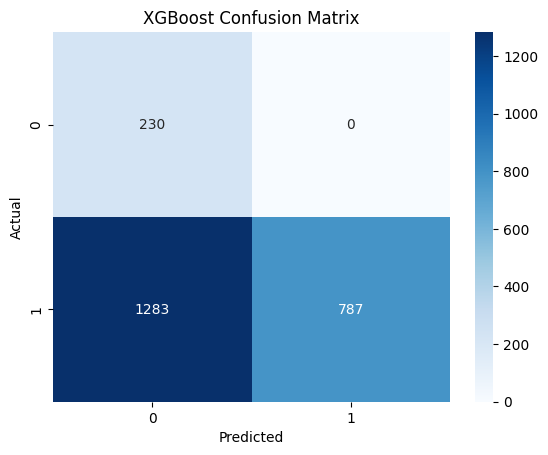

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


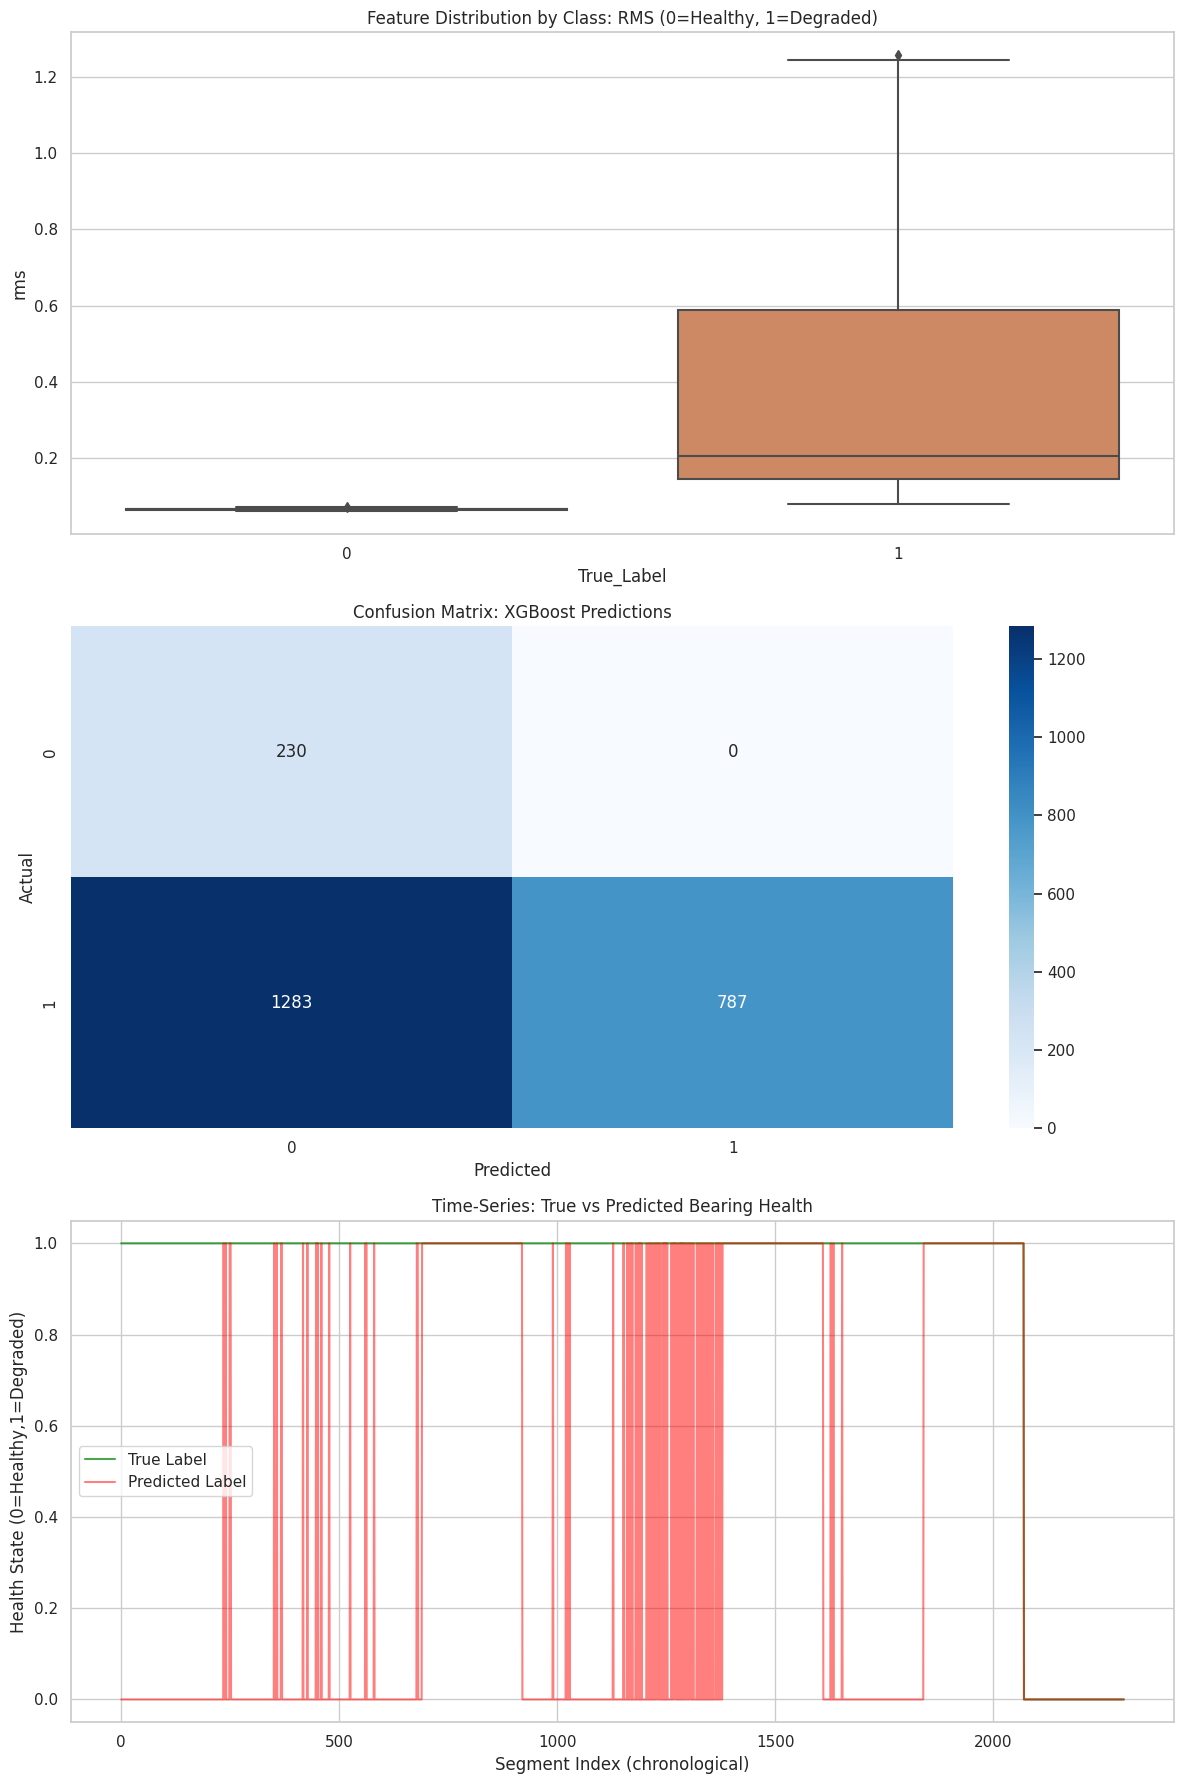

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming you already have:
# X (features), y (true labels), y_pred (model predictions)

# Combine into one DataFrame for easy plotting
df_viz = X.copy()
df_viz["True_Label"] = y
df_viz["Pred_Label"] = y_pred
df_viz["Index"] = np.arange(len(y))  # for time-series x-axis

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# -----------------------------
# 1. Feature distributions
# -----------------------------
sns.boxplot(x="True_Label", y="rms", data=df_viz, ax=axes[0])
axes[0].set_title("Feature Distribution by Class: RMS (0=Healthy, 1=Degraded)")

# -----------------------------
# 2. Confusion matrix heatmap
# -----------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1], ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix: XGBoost Predictions")

# -----------------------------
# 3. Time-series predictions
# -----------------------------
axes[2].plot(df_viz["Index"], df_viz["True_Label"], label="True Label", color="green", alpha=0.7)
axes[2].plot(df_viz["Index"], df_viz["Pred_Label"], label="Predicted Label", color="red", alpha=0.5)
axes[2].set_title("Time-Series: True vs Predicted Bearing Health")
axes[2].set_xlabel("Segment Index (chronological)")
axes[2].set_ylabel("Health State (0=Healthy,1=Degraded)")
axes[2].legend()

plt.tight_layout()
plt.show()


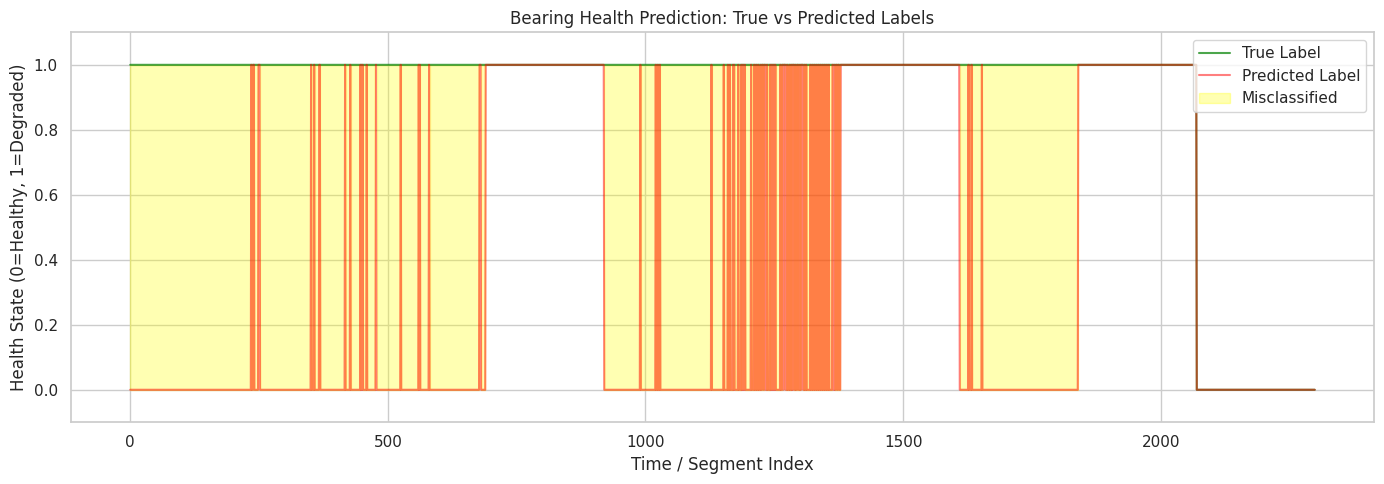

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Chronological index
idx = np.arange(len(y))

plt.figure(figsize=(14,5))
plt.plot(idx, y, label="True Label", color="green", alpha=0.7)
plt.plot(idx, y_pred, label="Predicted Label", color="red", alpha=0.5)

plt.fill_between(idx, 0, 1, where=(y != y_pred), color='yellow', alpha=0.3, label='Misclassified')

plt.title("Bearing Health Prediction: True vs Predicted Labels")
plt.xlabel("Time / Segment Index")
plt.ylabel("Health State (0=Healthy, 1=Degraded)")
plt.legend(loc="upper right")
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()


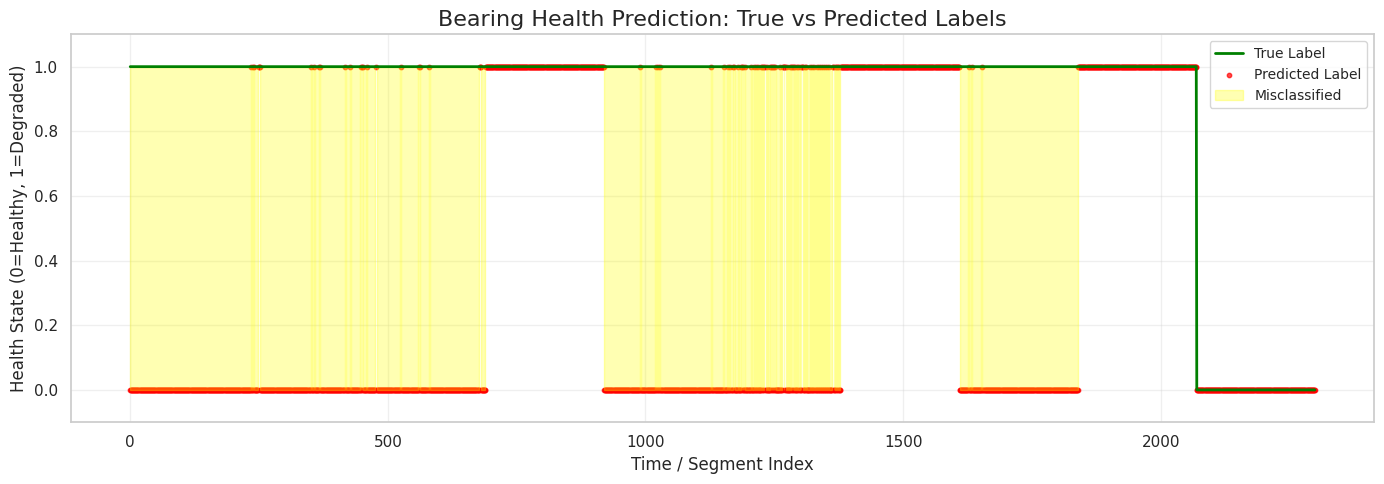

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Chronological index
idx = np.arange(len(y))

plt.figure(figsize=(14,5))

# True labels as line
plt.plot(idx, y, label="True Label", color="green", linewidth=2)

# Predicted labels as dots
plt.scatter(idx, y_pred, label="Predicted Label", color="red", s=10, alpha=0.7)

# Highlight misclassifications
plt.fill_between(idx, 0, 1, where=(y != y_pred), color='yellow', alpha=0.3, label='Misclassified')

# Titles and labels
plt.title("Bearing Health Prediction: True vs Predicted Labels", fontsize=16)
plt.xlabel("Time / Segment Index", fontsize=12)
plt.ylabel("Health State (0=Healthy, 1=Degraded)", fontsize=12)
plt.ylim(-0.1, 1.1)
plt.legend(loc="upper right", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


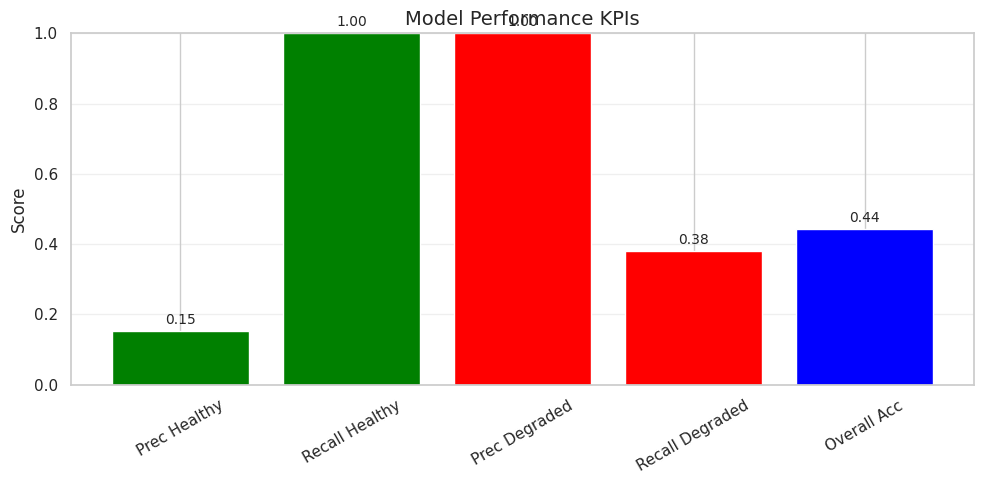

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Compute metrics
report = classification_report(y, y_pred, output_dict=True)
accuracy = (y == y_pred).mean()
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
precision_1 = report['1']['precision']
recall_1 = report['1']['recall']

# Bar chart for precision & recall
metrics = [precision_0, recall_0, precision_1, recall_1, accuracy]
labels = ['Prec Healthy','Recall Healthy','Prec Degraded','Recall Degraded','Overall Acc']

plt.figure(figsize=(10,5))
bars = plt.bar(labels, metrics, color=['green','green','red','red','blue'])
plt.ylim(0,1)
plt.title("Model Performance KPIs", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, f"{bar.get_height():.2f}", 
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np

# Assuming you already have:
# X (features), y (true labels), y_pred (predictions)

df_tableau = X.copy()
df_tableau["True_Label"] = y
df_tableau["Predicted_Label"] = y_pred
df_tableau["Correct"] = df_tableau["True_Label"] == df_tableau["Predicted_Label"]
df_tableau["Segment_Index"] = np.arange(len(y))

# Export to CSV
df_tableau.to_csv("bearing_predictions_tableau.csv", index=False)
print("CSV for Tableau exported!")


CSV for Tableau exported!


In [34]:
import json
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you already have:
# y (true labels) and y_pred (model predictions)

# Get classification report
report = classification_report(y, y_pred, output_dict=True)

# Accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
cm_list = cm.tolist()  # for JSON export

# Build summary dictionary
summary = {
    "accuracy": round(accuracy, 3),
    "precision": round(report["weighted avg"]["precision"], 3),
    "recall": round(report["weighted avg"]["recall"], 3),
    "f1_score": round(report["weighted avg"]["f1-score"], 3),
    "confusion_matrix": cm_list,
    "labels": list(set(y))  # in case you want to render axis labels
}

# Save to JSON
with open("model_results.json", "w") as f:
    json.dump(summary, f, indent=4)

print("✅ Exported model_results.json")


✅ Exported model_results.json
